<a href="https://colab.research.google.com/github/jetchirag/iris-yolo/blob/main/IRIS_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%pip install ultralytics -qq

In [13]:
# Download our test videos
!rm -f iris?.webm stock*.webm
!wget -O iris1.webm https://www.shutterstock.com/shutterstock/videos/1103840695/preview/stock-footage-robber-in-black-mask-broke-into-an-apartment-or-house-a-criminal-in-the-night-with-a-flashlight.webm
!wget -O iris2.webm https://www.shutterstock.com/shutterstock/videos/1092701461/preview/stock-footage-burglar-robber-break-door-lock-and-entering-building-apartment-house-robbery-home-burglary.webm
!wget -O iris3.webm https://www.shutterstock.com/shutterstock/videos/1100400817/preview/stock-footage-silhouette-a-man-in-an-apartment-with-an-modern-kitchen-interior-the-man-walks-through-the-kitchen.webm

--2023-12-28 07:45:41--  https://www.shutterstock.com/shutterstock/videos/1103840695/preview/stock-footage-robber-in-black-mask-broke-into-an-apartment-or-house-a-criminal-in-the-night-with-a-flashlight.webm
Resolving www.shutterstock.com (www.shutterstock.com)... 18.239.36.22, 18.239.36.6, 18.239.36.57, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|18.239.36.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1880950 (1.8M) [video/webm]
Saving to: ‘iris1.webm’

iris1.webm          100%[===================>]   1.79M  --.-KB/s    in 0.03s   

2023-12-28 07:45:41 (69.6 MB/s) - ‘iris1.webm’ saved [1880950/1880950]

--2023-12-28 07:45:41--  https://www.shutterstock.com/shutterstock/videos/1092701461/preview/stock-footage-burglar-robber-break-door-lock-and-entering-building-apartment-house-robbery-home-burglary.webm
Resolving www.shutterstock.com (www.shutterstock.com)... 18.239.36.22, 18.239.36.6, 18.239.36.57, ...
Connecting to www.shutterstock.com

In [6]:
from google.colab.patches import cv2_imshow
import ultralytics
import os
import cv2
import time

In [7]:
ultralytics.checks()

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


100%|██████████| 6.23M/6.23M [00:00<00:00, 117MB/s]


100%|██████████| 486k/486k [00:00<00:00, 30.7MB/s]


image 1/1 /content/image-1.jpeg: 448x640 1 person, 299.3ms
Speed: 18.5ms preprocess, 299.3ms inference, 27.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


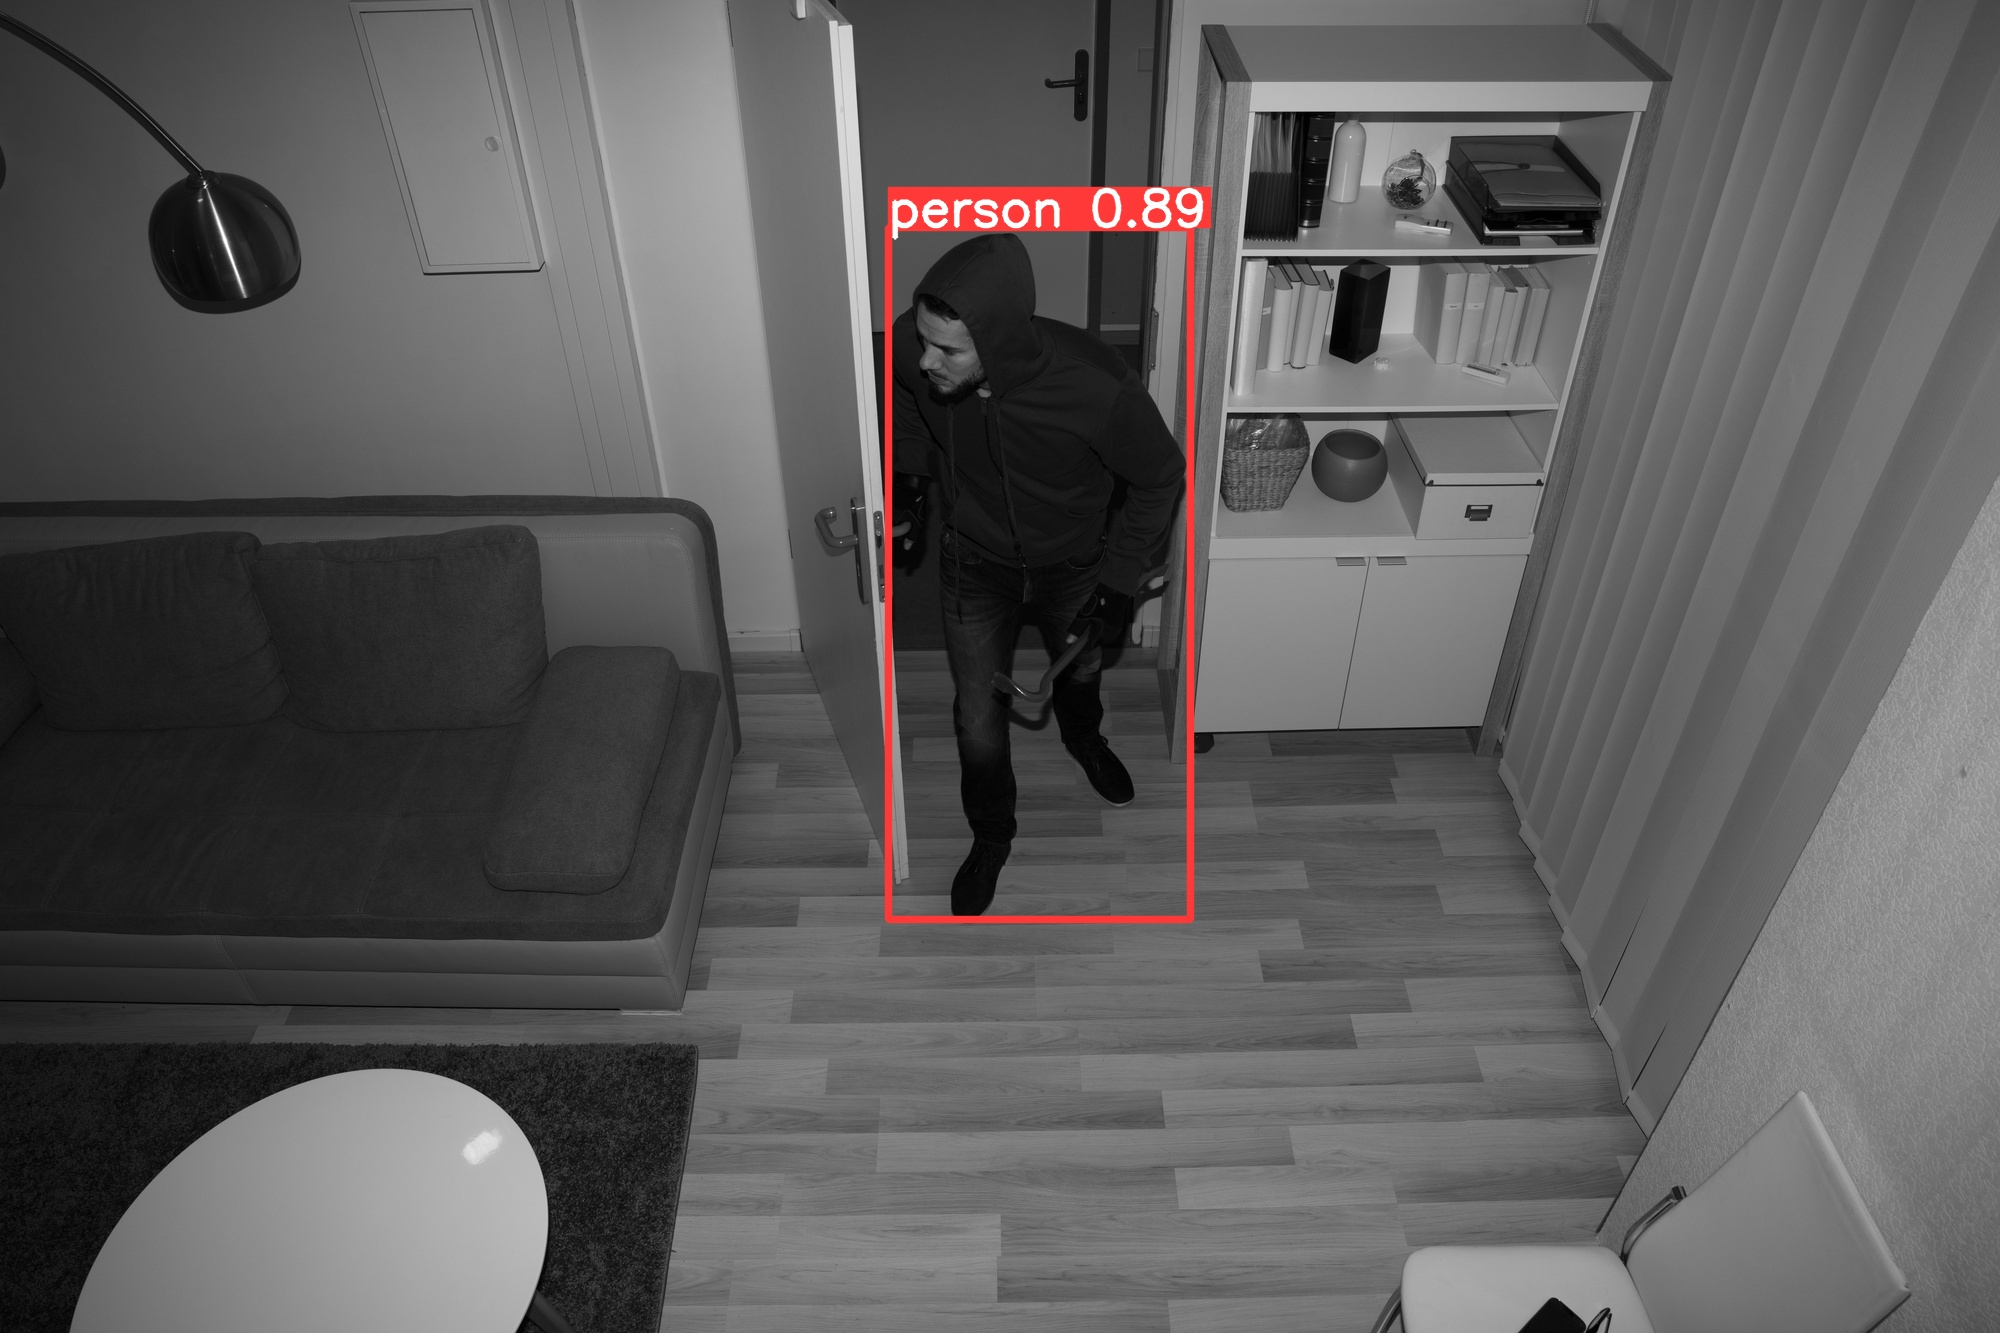

True

In [8]:
model = ultralytics.YOLO('yolov8n.pt')

def is_person(img_path, show=False, threshold=0.5):
  results = model.predict(img_path, classes=0, save=show, conf=threshold)
  # results = model.predict(img_path, save=show, conf=0.1)

  if (show):
    for img in os.listdir(results[0].save_dir):
      img_path = os.path.join(results[0].save_dir, img)
      image = cv2.imread(img_path)
      cv2_imshow(image)
      os.remove(img_path)
      os.rmdir(results[0].save_dir)

  confs = results[0].boxes.conf
  if (confs.numel() > 0):
    return True
  else:
    return False

image = "https://cdn11.bigcommerce.com/s-6ythiq/product_images/uploaded_images/image-1.jpeg"
is_person(image, show=True)

In [ ]:
# MANUALLY DIVIDING VIDEO IN FRAME
# NO LONGER NEEDED

video_path='iristest.webm'

cap = cv2.VideoCapture(video_path)

# for fps
start_time = time.time()
frame_count = 0


items = 10000
while cap.isOpened():
  items = items - 1
  if items < 0:
    break

  success, frame = cap.read()

  if success:
    results = model(frame, classes=0)
    # annotated_frame = results[0].plot()
    # cv2_imshow(annotated_frame)

    frame_count += 1
    if frame_count % 10 == 0:
        elapsed_time = time.time() - start_time
        fps_calc = frame_count / elapsed_time
        print(f"Current FPS: {fps_calc:.2f}")

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

In [ ]:
# NOW TESTING YOLO ON VIDEOS / FOR LIVE STREAM

start_time = time.time()

model.predict('iris1.webm', save=True)
print("--- %s seconds ---" % (time.time() - start_time))




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/862) /content/iris1.webm: 384x640 1 person, 463.2ms
video 1/1 (2/862) /content/iris1.webm: 384x640 1 person, 598.0ms
video 1/1 (3/862) /content/iris1.webm: 384x640 1 person, 999.4ms
video 1/1 (4/862) /content/iris1.webm: 384x640 1 person, 208.2ms
video 1/1 (5/862) /content/iris1.webm: 384x640 1 person, 204.6ms
video 1/1 (6/862) /content/iris1.webm: 384x640 1 person, 211.3ms
video 1/1 (7/862) /content/iris1.webm: 384x640 (no detections), 20